In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

In [2]:
data = pd.read_csv('silver_dataset_polarity_output.csv')
print(data)

       Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Unnamed: 0.1.1.1  \
0               0         17171           17171             25100   
1               1         17172           17172             25101   
2               2         17173           17173             25102   
3               3         17174           17174             25103   
4               4         17175           17175             25104   
...           ...           ...             ...               ...   
14280       14343         31514           31514             43812   
14281       14344         31515           31515             43813   
14282       14345         31516           31516             43814   
14283       14346         31517           31517             43815   
14284       14347         31518           31518             43816   

                        id      conversation_id           created_at  \
0      1376962511099035652  1376962511099035652  2021-03-30 23:50:20   
1      1376961972885938181 

In [3]:
id = data.loc[:,'id'].to_numpy()
text = data.loc[:,'tweet'].to_numpy()
polarity = data.loc[:,'polarity_api_output'].to_numpy()
dt = data.loc[:,'date'].to_numpy()

In [4]:
pos = dict()
neg = dict()
cnt = 0

for x in dt:
    if x not in pos:
        pos[x] = 0
    if x not in neg:
        neg[x] = 0
    # print(polarity[x].shape)
    if polarity[cnt] == 'POSITIVE':
        pos[x] += 1
    if polarity[cnt] == 'NEGATIVE':
        neg[x] += 1
    cnt += 1

for key, value in pos.items():
    cnt = pos[key] + neg[key]
    pos[key] = pos[key] / cnt
    neg[key] = neg[key] / cnt
    print(key, pos[key], neg[key])

2021-03-30 0.7578947368421053 0.24210526315789474
2021-03-29 0.776595744680851 0.22340425531914893
2021-03-28 0.6509433962264151 0.3490566037735849
2021-03-27 0.765625 0.234375
2021-03-26 0.7333333333333333 0.26666666666666666
2021-03-25 0.7705882352941177 0.22941176470588234
2021-03-24 0.717948717948718 0.28205128205128205
2021-03-23 0.6858974358974359 0.3141025641025641
2021-03-22 0.7243589743589743 0.27564102564102566
2021-03-21 0.6309523809523809 0.36904761904761907
2021-03-20 0.643312101910828 0.35668789808917195
2021-03-19 0.7657142857142857 0.2342857142857143
2021-03-18 0.7263681592039801 0.2736318407960199
2021-03-17 0.7609756097560976 0.23902439024390243
2021-03-16 0.7092511013215859 0.2907488986784141
2021-03-15 0.7279411764705882 0.27205882352941174
2021-03-14 0.8113207547169812 0.18867924528301888
2021-03-13 0.6904761904761905 0.30952380952380953
2021-03-12 0.7346938775510204 0.2653061224489796
2021-03-11 0.6686390532544378 0.33136094674556216
2021-03-10 0.7142857142857143 

In [9]:
from collections import OrderedDict

pos = OrderedDict(sorted(pos.items()))
neg = OrderedDict(sorted(neg.items()))

Text(0.5, 1.0, '% of Positive/Negative Tweets for given date')

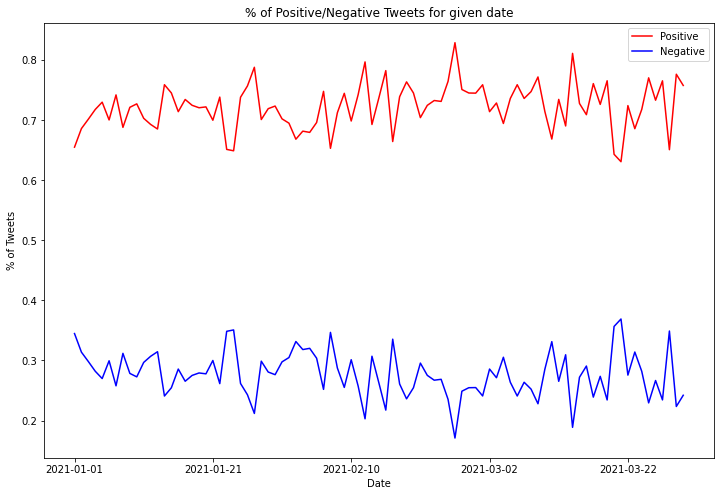

In [10]:
plt.plot(list(pos.keys()), list(pos.values()), color = 'r', label = 'Positive')
plt.plot(list(neg.keys()), list(neg.values()), color = 'b', label = 'Negative')
plt.xticks(list(pos.keys())[::20])
plt.legend()
plt.xlabel('Date')
plt.ylabel('% of Tweets')
plt.title("% of Positive/Negative Tweets for given date")

In [23]:
neg_idx = np.where(polarity=='NEGATIVE')[0]
pos_idx = np.where(polarity=='POSITIVE')[0]

In [24]:
np.random.shuffle(neg_idx)
np.random.shuffle(pos_idx)

In [25]:
neg_idx = neg_idx[:1000]
pos_idx = pos_idx[:1000]

In [28]:
idx = np.concatenate([neg_idx, pos_idx])

In [31]:
gold_raw = data.loc[idx]
print(gold_raw)

       Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Unnamed: 0.1.1.1  \
2972         3152         20323           20323             29249   
9039         9627         26798           26798             37553   
11616       12347         29518           29518             41076   
4105         4340         21511           21511             30765   
4706         4988         22159           22159             31655   
...           ...           ...             ...               ...   
9229         9831         27002           27002             37782   
11300       12014         29185           29185             40618   
5540         5882         23053           23053             32807   
12451       13225         30396           30396             42228   
6004         6384         23555           23555             33443   

                        id      conversation_id           created_at  \
2972   1369812663623180288  1369812663623180288  2021-03-11 06:19:23   
9039   1354514776534220804 

In [32]:
# gold_raw.to_csv('gold_raw.csv')

In [36]:
# tmp_data = pd.read_csv('gold_raw.csv')
# id = tmp_data.loc[:,['id','tweet']]
# # text = tmp_data.loc[:,'tweet']

In [38]:
# id.to_csv('sheet.csv')